# SQLAlchemy Homework - Surfs Up!
### SQLAlchemy Homework (sqlalchemy-challenge)    |    by: Shane Gatenby
----
----

##### Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

In [1]:
# Set my vacation start and end dates
vacation_start_date = "2020-03-20"
vacation_end_date = "2020-03-29"


##### Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

##### Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [4]:
# Set database filepath
hawaii_db_filepath = "../../SMU_DS/02-Homework/10-Advanced-Data-Storage-and-Retrieval/Instructions/Resources/hawaii.sqlite"


In [5]:
# Create an engine that uses and and communicates with the "hawaii.sqlite" database
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{hawaii_db_filepath}")


In [6]:
# Declare Base using automap_base()
Base = automap_base()

# Use Base class to reflect the database tables
Base.prepare(engine, reflect=True)


##### Explore Databases/Tables

In [7]:
# Visualize the classes found with automap that are mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [8]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Set a reference for each class/table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [12]:
# Create session from Python to the database
session = Session(engine)


In [13]:
# Display the row's columns and data in dictionary format for Station
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121cb6090>,
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [14]:
# Display the row's columns and data in dictionary format for Measurement
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121cbd050>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

## Exploratory Climate Analysis

### Precipitation Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

##### Calculate the date 1 year ago from the last data point in the database

In [16]:
# Step 1: calculate latest (or max) date in the database
# Method 1: using order descending order, limit one result
# measurement_max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()
measurement_max_date1 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(measurement_max_date1)


2017-08-23


In [17]:
# Step 1: calculate latest (or max) date in the database
# Method 2: using func.max, unpack from tuple
measurement_max_date2 = (session.query(func.max(Measurement.date)).first())[0]

# Unpack the `date` from results and save into separate lists
# measurement_max_date = [result for result in measurement_max_date][0]
# print(measurement_max_date2)
print(measurement_max_date2)

2017-08-23


In [18]:
# Step 2, calculate 1 year ago from latest/max date
# Method 1, using datetime.strptime and dt.timedelta
measurement_max_date_minus_1_year1 = datetime.strptime(measurement_max_date2, '%Y-%m-%d')
measurement_max_date_minus_1_year1 = measurement_max_date_minus_1_year1 - dt.timedelta(days=365)
print(measurement_max_date_minus_1_year1)


2016-08-23 00:00:00


In [19]:
# Step 2, calculate 1 year ago from latest/max date
# Method 2, using engine.execute and DATE(date,'-1 year'), unpack from returned list and tuple
measurement_max_date_minus_1_year = engine.execute("SELECT DATE(MAX(date),'-1 year') FROM measurement").fetchall()[0][0]
print(measurement_max_date_minus_1_year)


2016-08-23


##### Perform a query to retrieve the data and precipitation scores

In [20]:
# Perform a query to retrieve the data and precipitation values; limit to 5 to visualize
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= measurement_max_date_minus_1_year).limit(5).all()


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

##### Save the query results as a Pandas DataFrame and set the index to the date column

In [21]:
# Save the query results as a Pandas DataFrame
measurement_data_most_recent_year = session.query(Measurement.date, Measurement.prcp).\
                                        filter(Measurement.date >= measurement_max_date_minus_1_year).all()
measurement_df = pd.DataFrame(measurement_data_most_recent_year)

# Rename column "prcp": "precipitation"
measurement_df = measurement_df.rename(columns={"prcp":"precipitation"})

# Set the index to the date column
measurement_df = measurement_df.set_index('date')

# Visualize DataFrame
measurement_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


##### Sort the dataframe by date

In [22]:
# Sort the DataFrame by date
# measurement_df.sort_index(ascending=False)
measurement_df = measurement_df.sort_values(by="date",ascending=True)

# Visualize DataFrame
measurement_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [23]:
# Drop NaN prcp values
measurement_df = measurement_df.dropna()

##### Use Pandas Plotting with Matplotlib to plot the data
* NOTE: in the ReadMe, the ask is to plot the results using the DataFrame plot method, so using .plot()

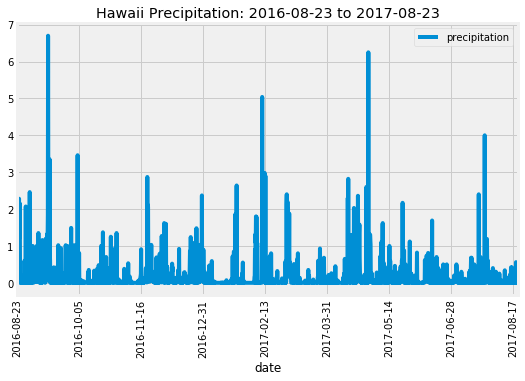

In [24]:
measurement_df.plot(
    figsize=(8,5),
    title=f"Hawaii Precipitation: {measurement_max_date_minus_1_year} to {measurement_max_date2}",
    rot="vertical",
)
plt.show()

##### Use Pandas to print the summary statistics for the precipitation data.

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

##### Design a query to show how many stations are available in this dataset?

In [26]:
# Design a query to calculate the total number of stations.
    # All data in "Measurement", not from filtered data used in Precipitation Analysis
session.query(func.count(session.query(Measurement.station).group_by(Measurement.station))).all()


[(9)]

##### Design a query to find the most active stations.

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
        filter(Measurement.station == Station.station).\
        group_by(Measurement.station, Station.name).\
        order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [28]:
# Which station has the highest number of observations?
station_with_most_obs = session.query(Measurement.station, Station.name, func.count(Measurement.station), func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                filter(Measurement.station == Station.station).\
                                group_by(Measurement.station, Station.name).\
                                order_by(func.count(Measurement.station).desc()).first()

# print(f"Station {station_with_most_obs[0]} had the highest number of observations ({station_with_most_obs[1]}).")
print(f"Station {station_with_most_obs[0]} ({station_with_most_obs[1]}) had the highest number of observations ({station_with_most_obs[2]}).")


Station USC00519281 (WAIHEE 837.5, HI US) had the highest number of observations (2772).


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
print(f"Station {station_with_most_obs[0]} ({station_with_most_obs[1]}) lowest temperature recorded: {station_with_most_obs[3]}")
print(f"Station {station_with_most_obs[0]} ({station_with_most_obs[1]}) highest temperature recorded: {station_with_most_obs[4]}")
print(f"Station {station_with_most_obs[0]} ({station_with_most_obs[1]}) average temperature recorded: {station_with_most_obs[5]}")


Station USC00519281 (WAIHEE 837.5, HI US) lowest temperature recorded: 54.0
Station USC00519281 (WAIHEE 837.5, HI US) highest temperature recorded: 85.0
Station USC00519281 (WAIHEE 837.5, HI US) average temperature recorded: 71.66378066378067


##### Design a query to retrieve the last 12 months of temperature observation data (tobs) and plot the results as a histogram

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.station == station_with_most_obs[0]).\
                filter(Measurement.date >= measurement_max_date_minus_1_year).all()

tobs_last_12_months_station_with_most_obs = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
                                                filter(Measurement.station == Station.station).\
                                                filter(Measurement.station == station_with_most_obs[0]).\
                                                filter(Measurement.date >= measurement_max_date_minus_1_year).all()

tobs_last_12_months_station_with_most_obs_df = pd.DataFrame(tobs_last_12_months_station_with_most_obs)

# Visualize DataFrame
tobs_last_12_months_station_with_most_obs_df.head()


,station,name,date,tobs
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0


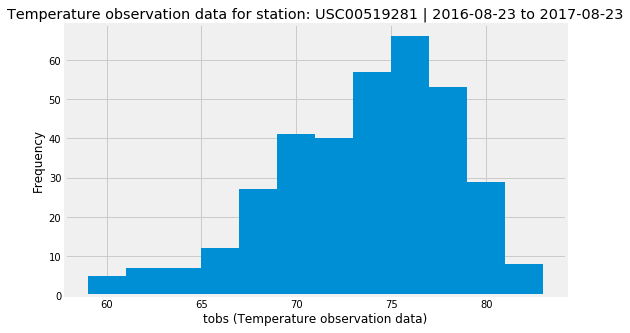

In [31]:
# Plot the last 12 months of temperature observation data for this station as a histogram
plt.figure(figsize=[8,5])
plt.title(f"Temperature observation data for station: {station_with_most_obs[0]} | {measurement_max_date_minus_1_year} to {measurement_max_date2}")
plt.xlabel("tobs (Temperature observation data)")
plt.ylabel("Frequency")
plt.hist(tobs_last_12_months_station_with_most_obs_df["tobs"],bins=12)
plt.show()


## Climate App

##### Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
##### Use FLASK to create your routes

#### Note: Please see app.py file included for the Climate App

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# NOTE: this wasn't a part of readme or rubrik, but used my vacation dates and the most recent year of data available in the dataset
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]
